In [11]:
import pandas as pd
import os
#import geopandas as gpd
from shapely import wkt
import contextily as ctx
import geodatasets
from icecream import ic
import warnings
import matplotlib.pyplot as plt
import pygwalker as pyg
import numpy as np
import seaborn as sns
import sweetviz as sv
from visuals_plots import *
warnings.filterwarnings('ignore')

# Reading of datasets

In [12]:
os.chdir('C:/Users/edwin/OneDrive/Escritorio/Personal files/Courses/Semester 2/Capstone Project/Databases')

In [13]:
directory_contents = os.listdir('.')
directory_contents

['ODBus_v1.csv', 'Other Databases', 'toronto data.csv', 'vancouver data.csv']

## Open database of businesses

In [14]:
db_b=pd.read_csv('ODBus_v1.csv').fillna('')
db_b.head()

,idx,business_name,alt_business_name,business_sector,business_subsector,business_description,business_id_no,licence_number,licence_type,derived_NAICS,...,street_type,city,prov_terr,total_no_employees,status,provider,geo_source,CSDUID,CSDNAME,PRUID
0,8bcde34e196bcbb440a2,Healthconnect Pharmacy,..,Community Pharmacy,..,..,..,..,..,44,...,..,Moncton,NB,..,..,City of Moncton,Source,1307022,Moncton,13
1,87cfdddd858f54356f04,Innomar Pharmacy Inc.,..,Community Pharmacy,..,..,..,..,..,44,...,..,Moncton,NB,..,..,City of Moncton,Source,1307022,Moncton,13
2,263962f164fdbeba64a0,Express Scripts Canada Pharmacy,..,Community Pharmacy,..,..,..,..,..,44,...,..,Moncton,NB,..,..,City of Moncton,Source,1307045,Dieppe,13
3,f0ea2ef9552a6ade5430,Tomavo,..,Limited Groceries,..,..,..,..,..,..,...,..,Moncton,NB,..,..,City of Moncton,Source,1307022,Moncton,13
4,7f7958a5f4736f09aa22,Cameron Street Clinic,..,Community Pharmacy,..,..,..,..,..,44,...,..,Moncton,NB,..,..,City of Moncton,Source,1307022,Moncton,13


In [15]:
db_b.columns

Index(['idx', 'business_name', 'alt_business_name', 'business_sector',
       'business_subsector', 'business_description', 'business_id_no',
       'licence_number', 'licence_type', 'derived_NAICS',
       'source_NAICS_primary', 'source_NAICS_secondary', 'NAICS_descr',
       'NAICS_descr2', 'latitude', 'longitude', 'full_address', 'postal_code',
       'unit', 'street_no', 'street_name', 'street_direction', 'street_type',
       'city', 'prov_terr', 'total_no_employees', 'status', 'provider',
       'geo_source', 'CSDUID', 'CSDNAME', 'PRUID'],
      dtype='object')

In [16]:
db_b.describe()

,idx,business_name,alt_business_name,business_sector,business_subsector,business_description,business_id_no,licence_number,licence_type,derived_NAICS,...,street_type,city,prov_terr,total_no_employees,status,provider,geo_source,CSDUID,CSDNAME,PRUID
count,446575,446575,446575,446575,446575,446575,446575,446575,446575,446575,...,446575,446575,446575,446575,446575,446575,446575,446575,446575,446575
unique,446574,339452,36107,31217,4344,49444,62225,290161,288,27,...,61,855,7,357,5,35,4,501,482,10
top,,TIM HORTONS,..,..,..,..,..,..,..,72,...,..,Toronto,ON,..,..,City of Toronto,Source,..,..,35
freq,2,832,402468,104776,392958,366392,372448,147417,375040,78435,...,394989,110438,205122,318230,284422,125681,183035,131644,131644,134697


In [17]:
sub_b=db_b[['business_name','alt_business_name','business_sector','business_subsector','business_description']]
sub_b=sub_b.rename(
    columns={
    'business_name':'BusinessName',
    'alt_business_name':'BusinessTradeName',
    'business_sector':'BusinessType',
    'business_subsector':'BusinessSubType',
    'business_description':'BusinessDescription'
}
)
sub_b['Source']='LODE'
sub_b

,BusinessName,BusinessTradeName,BusinessType,BusinessSubType,BusinessDescription,Source
0,Healthconnect Pharmacy,..,Community Pharmacy,..,..,LODE
1,Innomar Pharmacy Inc.,..,Community Pharmacy,..,..,LODE
2,Express Scripts Canada Pharmacy,..,Community Pharmacy,..,..,LODE
3,Tomavo,..,Limited Groceries,..,..,LODE
4,Cameron Street Clinic,..,Community Pharmacy,..,..,LODE
...,...,...,...,...,...,...
446570,Water Matrix,..,Energy Efficiency And Renewable Energy,..,Water Conservation consultants Water COnservat...,LODE
446571,GREAT NORTHERN INSULATION,..,Insulation Installer,..,..,LODE
446572,GNI MANAGEMENT GROUP,..,Insulation Installer,..,..,LODE
446573,BRW PLUMBING SERVICES,..,Plumbing Contractor,..,..,LODE


## Vancouver Dataset

In [18]:
directory_contents = os.listdir('.')
directory_contents

['ODBus_v1.csv', 'Other Databases', 'toronto data.csv', 'vancouver data.csv']

In [19]:
db_v=pd.read_csv('vancouver data.csv',sep=';').fillna('')
db_v.head()

,FOLDERYEAR,LicenceRSN,LicenceNumber,LicenceRevisionNumber,BusinessName,BusinessTradeName,Status,IssuedDate,ExpiredDate,BusinessType,...,City,Province,Country,PostalCode,LocalArea,NumberofEmployees,FeePaid,ExtractDate,Geom,geo_point_2d
0,15,2333488,15-103790,0,Hollyhock Properties Ltd,,Issued,2014-12-03T17:52:38-05:00,2015-12-31,Apartment House Strata,...,Vancouver,BC,CA,V5Z 4B1,Fairview,0.0,64.0,2019-07-21T16:49:14-04:00,"{""coordinates"": [-123.116856730836, 49.2678622...","49.2678622929998, -123.116856730836"
1,15,2333496,15-103798,0,(Zandra Paleczny),,Issued,2014-11-06T18:25:17-05:00,2015-12-31,Apartment House Strata,...,Vancouver,BC,CA,V6E 1R9,West End,0.0,64.0,2019-07-21T16:49:14-04:00,"{""coordinates"": [-123.133925222671, 49.2796620...","49.2796620031115, -123.133925222671"
2,15,2333501,15-103803,0,(Dave Dixon),,Issued,2014-11-13T20:04:43-05:00,2015-12-31,Apartment House Strata,...,Vancouver,BC,CA,V6E 3Z8,West End,0.0,64.0,2019-07-21T16:49:14-04:00,"{""coordinates"": [-123.124998311257, 49.2836868...","49.2836868407842, -123.124998311257"
3,15,2333502,15-103804,0,Henry B Yuen (Henry Yuen),,Issued,2014-12-05T16:25:45-05:00,2015-12-31,Apartment House Strata,...,Vancouver,BC,CA,,Downtown,0.0,64.0,2019-07-21T16:49:14-04:00,"{""coordinates"": [-123.132003087572, 49.2741705...","49.2741705397492, -123.132003087572"
4,15,2333506,15-103808,0,Tsang & Lee Enterprises Inc,,Issued,2015-01-07T13:17:18-05:00,2015-12-31,Apartment House Strata,...,Vancouver,BC,CA,,Fairview,0.0,64.0,2019-07-21T16:49:14-04:00,"{""coordinates"": [-123.117431658016, 49.2687000...","49.2687000536747, -123.117431658016"


In [20]:
db_v.columns

Index(['FOLDERYEAR', 'LicenceRSN', 'LicenceNumber', 'LicenceRevisionNumber',
       'BusinessName', 'BusinessTradeName', 'Status', 'IssuedDate',
       'ExpiredDate', 'BusinessType', 'BusinessSubType', 'Unit', 'UnitType',
       'House', 'Street', 'City', 'Province', 'Country', 'PostalCode',
       'LocalArea', 'NumberofEmployees', 'FeePaid', 'ExtractDate', 'Geom',
       'geo_point_2d'],
      dtype='object')

In [21]:
db_v.BusinessType.drop_duplicates()

0             Apartment House Strata
259           Animal Clinic/Hospital
274                           Arcade
276                  Animal Services
325                       Auctioneer
                     ...            
111339        Late Night Dance Event
173571    Sprinkler & Gas Contractor
421523              Vending Machines
421603    Transient Trader/Peddler-W
586606                  Auto Wrecker
Name: BusinessType, Length: 183, dtype: object

In [22]:
sub_v=db_v[['BusinessName','BusinessTradeName','BusinessType','BusinessSubType']]
sub_v['Source']='Vancouver'
sub_v

,BusinessName,BusinessTradeName,BusinessType,BusinessSubType,Source
0,Hollyhock Properties Ltd,,Apartment House Strata,,Vancouver
1,(Zandra Paleczny),,Apartment House Strata,,Vancouver
2,(Dave Dixon),,Apartment House Strata,,Vancouver
3,Henry B Yuen (Henry Yuen),,Apartment House Strata,,Vancouver
4,Tsang & Lee Enterprises Inc,,Apartment House Strata,,Vancouver
...,...,...,...,...,...
708507,CENTURION HARDWOOD FLOORS LTD.,,Retail Dealer,Other,Vancouver
708508,(Rebecca Wang),,Apartment House Strata,,Vancouver
708509,(Rebecca Wang),,Apartment House Strata,,Vancouver
708510,Ranjit Gadey & Equbal Gill,,Secondary Suite - Permanent,,Vancouver


## Toronto Dataset

In [23]:
directory_contents = os.listdir('.')
directory_contents

['ODBus_v1.csv', 'Other Databases', 'toronto data.csv', 'vancouver data.csv']

In [24]:
db_t=pd.read_csv('toronto data.csv').fillna('')
db_t.head()

,_id,Category,Licence No.,Operating Name,Issued,Client Name,Business Phone,Business Phone Ext.,Licence Address Line 1,Licence Address Line 2,Licence Address Line 3,Conditions,Free Form Conditions Line 1,Free Form Conditions Line 2,Plate No.,Endorsements,Cancel Date,Last Record Update
0,1,PRIVATE TRANSPORTATION COMPANY,B02-4741962,TAXIFY,2018-01-18,TAXIFY CANADA INC,,,"35 OAK ST, #304","TORONTO, ON",M9N 1A1,TAXIFY;,,,,PRIVATE TRANSPORTATION COMPANY;,2018-12-07,2018-12-07
1,2,PRIVATE TRANSPORTATION COMPANY,B02-4728645,INSTARYDE,2017-09-08,INSTARYDE INC,,,425 ALNESS ST,"TORONTO, ON",M3J 2T8,INSTARYDE;,,,,PRIVATE TRANSPORTATION COMPANY;,2018-12-10,2019-05-06
2,3,PRIVATE TRANSPORTATION COMPANY,B02-4807677,DRIVEHER TRANSPORTATION,2018-03-08,DRIVEHER TRANSPORTATION INC,,,"100 DUNDAS ST E, #502","MISSISSAUGA, ON",L5A 1W5,DRIVEHER;,,,,PRIVATE TRANSPORTATION COMPANY;,2021-12-23,2021-12-23
3,4,PRIVATE TRANSPORTATION COMPANY,B02-4714142,RIDEIN,2017-05-18,RIDE INC,,,379 BERING AVE,"TORONTO, ON",M8Z 3B1,RIDEIN;,,,,PRIVATE TRANSPORTATION COMPANY;,2023-05-01,2023-06-07
4,5,PRIVATE TRANSPORTATION COMPANY,B02-5006733,CAPPTIN,2020-07-21,CAPPTIN TECHNOLOGIES (CND) INC,,,"4950 YONGE ST, #2200","TORONTO, ON",M2N 6K1,CAPPTIN;,,,,PRIVATE TRANSPORTATION COMPANY;,2023-05-01,2023-06-07


In [25]:
sub_t=db_t[['Operating Name','Category','Endorsements']]

sub_t= sub_t.rename(
    columns=
    {
        'Operating Name':'BusinessName',
        'Category':'BusinessType',
        'Endorsements':'BusinessSubType'
     }
)
sub_t['Source']='Toronto'
sub_t

,BusinessName,BusinessType,BusinessSubType,Source
0,TAXIFY,PRIVATE TRANSPORTATION COMPANY,PRIVATE TRANSPORTATION COMPANY;,Toronto
1,INSTARYDE,PRIVATE TRANSPORTATION COMPANY,PRIVATE TRANSPORTATION COMPANY;,Toronto
2,DRIVEHER TRANSPORTATION,PRIVATE TRANSPORTATION COMPANY,PRIVATE TRANSPORTATION COMPANY;,Toronto
3,RIDEIN,PRIVATE TRANSPORTATION COMPANY,PRIVATE TRANSPORTATION COMPANY;,Toronto
4,CAPPTIN,PRIVATE TRANSPORTATION COMPANY,PRIVATE TRANSPORTATION COMPANY;,Toronto
...,...,...,...,...
154412,GOOD BEHAVIOUR ICE CREAM,NON-MOTORIZED REFRESHMENT VEHICLE OWNER,RV - NON-MOTORIZED - ICE CREAM;,Toronto
154413,CHURROS BY REBOZOS,NON-MOTORIZED REFRESHMENT VEHICLE OWNER,RV - NON-MOTORIZED - PROPANE HEATER;,Toronto
154414,FAST FOOD CART,NON-MOTORIZED REFRESHMENT VEHICLE OWNER,RV - NON-MOTORIZED - PROPANE HEATER;,Toronto
154415,BEE BOX FOODS,NON-MOTORIZED REFRESHMENT VEHICLE OWNER,RV - TRAILER - ELECTRIC;,Toronto


## Analysis of expressions

In [26]:
cat=pd.concat([sub_b, sub_t, sub_v], ignore_index=True, sort=False).fillna('')
cat

,BusinessName,BusinessTradeName,BusinessType,BusinessSubType,BusinessDescription,Source
0,Healthconnect Pharmacy,..,Community Pharmacy,..,..,LODE
1,Innomar Pharmacy Inc.,..,Community Pharmacy,..,..,LODE
2,Express Scripts Canada Pharmacy,..,Community Pharmacy,..,..,LODE
3,Tomavo,..,Limited Groceries,..,..,LODE
4,Cameron Street Clinic,..,Community Pharmacy,..,..,LODE
...,...,...,...,...,...,...
1309499,CENTURION HARDWOOD FLOORS LTD.,,Retail Dealer,Other,,Vancouver
1309500,(Rebecca Wang),,Apartment House Strata,,,Vancouver
1309501,(Rebecca Wang),,Apartment House Strata,,,Vancouver
1309502,Ranjit Gadey & Equbal Gill,,Secondary Suite - Permanent,,,Vancouver


In [27]:
cat['filter']=cat['BusinessName']+cat['BusinessTradeName']+cat['BusinessType']+cat['BusinessSubType']+cat['BusinessDescription']
cat

,BusinessName,BusinessTradeName,BusinessType,BusinessSubType,BusinessDescription,Source,filter
0,Healthconnect Pharmacy,..,Community Pharmacy,..,..,LODE,Healthconnect Pharmacy..Community Pharmacy....
1,Innomar Pharmacy Inc.,..,Community Pharmacy,..,..,LODE,Innomar Pharmacy Inc...Community Pharmacy....
2,Express Scripts Canada Pharmacy,..,Community Pharmacy,..,..,LODE,Express Scripts Canada Pharmacy..Community Pha...
3,Tomavo,..,Limited Groceries,..,..,LODE,Tomavo..Limited Groceries....
4,Cameron Street Clinic,..,Community Pharmacy,..,..,LODE,Cameron Street Clinic..Community Pharmacy....
...,...,...,...,...,...,...,...
1309499,CENTURION HARDWOOD FLOORS LTD.,,Retail Dealer,Other,,Vancouver,CENTURION HARDWOOD FLOORS LTD.Retail DealerOther
1309500,(Rebecca Wang),,Apartment House Strata,,,Vancouver,(Rebecca Wang)Apartment House Strata
1309501,(Rebecca Wang),,Apartment House Strata,,,Vancouver,(Rebecca Wang)Apartment House Strata
1309502,Ranjit Gadey & Equbal Gill,,Secondary Suite - Permanent,,,Vancouver,Ranjit Gadey & Equbal GillSecondary Suite - Pe...


In [28]:
cat["filter"]=cat["filter"].str.lower()
cat["filter"]=cat["filter"].str.strip()
cat

,BusinessName,BusinessTradeName,BusinessType,BusinessSubType,BusinessDescription,Source,filter
0,Healthconnect Pharmacy,..,Community Pharmacy,..,..,LODE,healthconnect pharmacy..community pharmacy....
1,Innomar Pharmacy Inc.,..,Community Pharmacy,..,..,LODE,innomar pharmacy inc...community pharmacy....
2,Express Scripts Canada Pharmacy,..,Community Pharmacy,..,..,LODE,express scripts canada pharmacy..community pha...
3,Tomavo,..,Limited Groceries,..,..,LODE,tomavo..limited groceries....
4,Cameron Street Clinic,..,Community Pharmacy,..,..,LODE,cameron street clinic..community pharmacy....
...,...,...,...,...,...,...,...
1309499,CENTURION HARDWOOD FLOORS LTD.,,Retail Dealer,Other,,Vancouver,centurion hardwood floors ltd.retail dealerother
1309500,(Rebecca Wang),,Apartment House Strata,,,Vancouver,(rebecca wang)apartment house strata
1309501,(Rebecca Wang),,Apartment House Strata,,,Vancouver,(rebecca wang)apartment house strata
1309502,Ranjit Gadey & Equbal Gill,,Secondary Suite - Permanent,,,Vancouver,ranjit gadey & equbal gillsecondary suite - pe...


In [29]:
expressions=[
    "food truck",
    "refreshment vehicle",
    "food cart",
    'fast food cart',
    "mobile kitchen",
    "street food vendor",
    "food trailer",
    "street vendor",
    "mobile vendor",
    "mobile vending",
    "meals on wheels",
    "food wagon",
    "mobile eatery",
    "rolling kitchen",
    "street food stall",
    "on-the-go food vendor",
    "food-on-wheels",
    "mobile gourmet",
    "culinary truck",
    "rolling restaurant",
    "curbside kitchen",
    "roaming eatery",
    "truck-based food service",
    "gastronomic truck",
    "roaming restaurant",
    "pop-up kitchen",
    "roaming bistro",
    "kitchen on wheels",
    "roaming kitchenette",
    "trucked cuisine",
    "roadside diner",
    "pop-up eatery",
    "mobile bites",
    "culinary cart",
    "on-the-move kitchen",
    "gourmet truck",
    "truck-mounted kitchen",
    "sidewalk food stall",
    "foodie van",
    "wheelhouse kitchen",
    "curb cuisine",
    "portable food vendor",
    "nomadic food vendor",
    "wanderlust food truck",
    "rolling food stand",
    "mobile restaurant",
    "eatery on wheels",
    "street-side dining",
    "mobile munchies",
    "kitchen cart",
    "wanderlunch truck",
    "roaming diner",
    "on-the-road eats",
    "traveling culinary",
    "food van",
    "curbside gourmet",
    "roaming meals",
    "roadside gastro",
    "street foodie",
    "kitchen cruiser",
    "traveling kitchen",
    "mobile chow",
    "foodie truck",
    "roaming tastebuds",
    "meals in motion",
    "food vehicle",
    "mobile food unit",
    "rolling food vendor",
    "curbside kitchenette",
    "roaming culinary cart",
    "truck-mounted restaurant",
    "meals on the move",
    "gourmet food vehicle",
    "curbside gastro",
    "food-on-the-go vehicle",
    "street-side gourmet",
    "roaming meals-on-wheels vehicle",
    "mobile dining truck",
    "culinary mobile unit",
    "rolling restaurant on the move",
    "food-on-the-go eatery",
    "mobile gourmet cuisine",
    "street-side food vendor",
    "rolling kitchen wagon",
    "roaming food station",
    "mobile dining experience",
    "curbside food stand",
    "traveling food booth",
    "on-the-move food vehicle",
    "culinary van",
    "rolling food cart",
    "roadside culinary station",
    "mobile meals",
    "gourmet on wheels",
    "street-side meals",
    "roaming foodie wagon",
    "on-the-go dining experience",
    "mobile kitchenette on wheels",
    "vending cart",
    "temporary food sales",
    "mobile food",
    "catering truck",
    "food wagon",
    "coffee truck",
    "coffee cart",
    "ice cream cart",
    "ice cream truck",
    "food trailer",
    "food van",
    "snack van",
    "portable cafe"
]

In [30]:
# Dictionary to store counts
expression_counts = {}

In [31]:
for expression in expressions:
    count = cat[cat['filter'].str.contains(expression, na=False)].shape[0]
    expression_counts[expression] = count

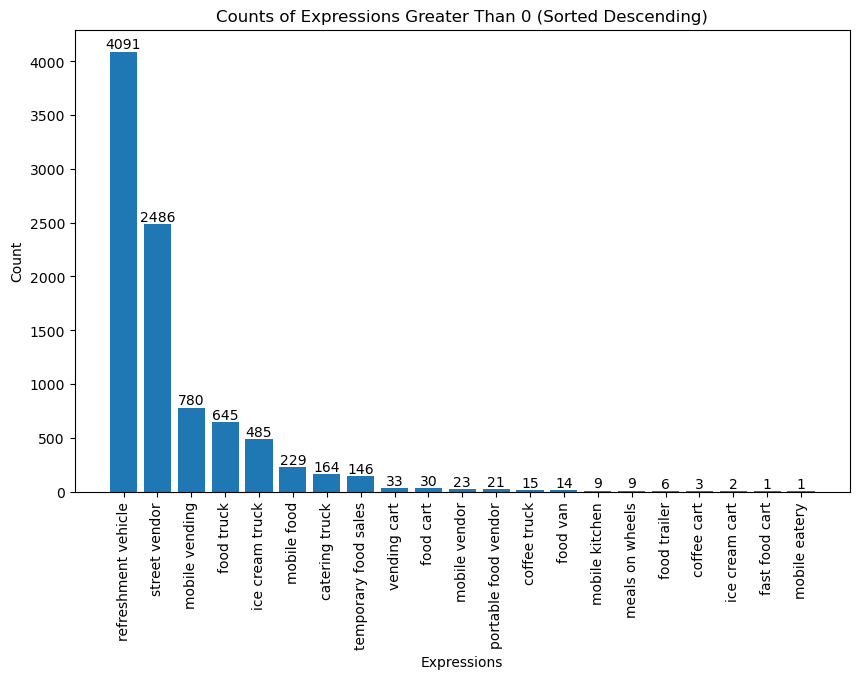

In [32]:
sorted_expression_counts = {exp: count for exp, count in sorted(expression_counts.items(), key=lambda item: item[1], reverse=True) if count > 0}
# Assuming sorted_expression_counts is your sorted dictionary
# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_expression_counts.keys(), sorted_expression_counts.values())

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel('Expressions')
plt.ylabel('Count')
plt.title('Counts of Expressions Greater Than 0 (Sorted Descending)')
plt.xticks(rotation=90)  # Rotate labels for better readability
## to show the graph
plt.show()

In [33]:
expression_counts_source = pd.DataFrame(
    {
        "count":[],
        "source":[]
    }
)

for source in cat.Source.unique().tolist():
    df_cat=cat[cat['Source']==source]
    for expression in expressions:
        count = df_cat[df_cat['filter'].str.contains(expression, na=False)].shape[0]
        
        expression_counts_source = expression_counts_source.append({
            'count': count,
            'source': source,
            'expression': expression
        }, ignore_index=True)
        #ic(count,source, expression)

In [34]:
expression_counts_source=expression_counts_source[expression_counts_source['count']>0]
expression_counts_source.source.count()

44

In [35]:
expression_counts_source.drop_duplicates(inplace=True)

In [36]:
expression_counts_source.sort_values(by=['count'],ascending=[False],inplace=True)

In [37]:
expression_counts_source.pivot(columns='source',values='count', index='expression')

source,LODE,Toronto,Vancouver
expression,,,
catering truck,18.0,NaN,146.0
coffee cart,2.0,NaN,1.0
coffee truck,10.0,3.0,2.0
fast food cart,NaN,1.0,NaN
food cart,6.0,2.0,22.0
food trailer,6.0,NaN,NaN
food truck,185.0,300.0,160.0
food van,2.0,NaN,12.0
ice cream cart,1.0,1.0,NaN


<Axes: xlabel='source', ylabel='expression'>

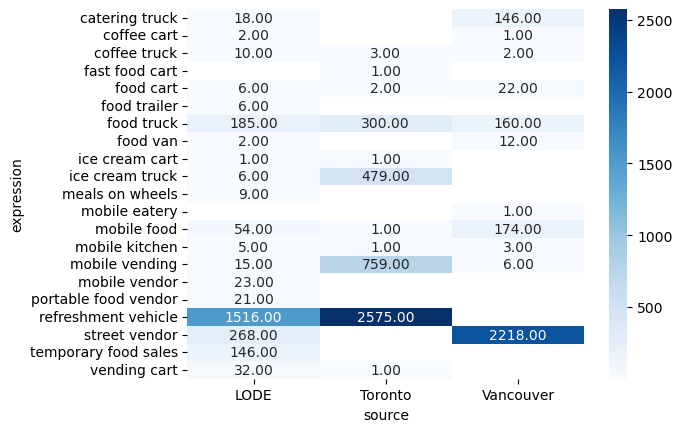

In [38]:
heatmap=sns.heatmap(expression_counts_source.pivot(columns='source',values='count', index='expression'),cmap='Blues',annot=True,fmt=".2f")
heatmap

Text(0.5, 1.0, 'Count of Expressions in the toronto Dataset')

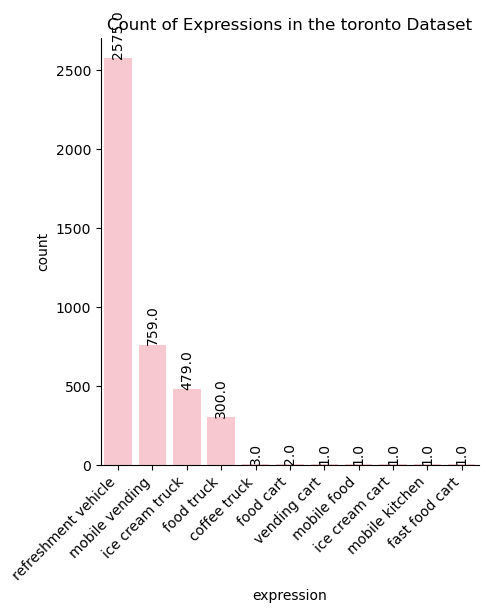

In [39]:
toronto_plot=sns.catplot(
            x='expression',y='count',
            data=expression_counts_source[expression_counts_source["source"]=='Toronto'],
            kind='bar', 
            color='pink').set_xticklabels( rotation=45, horizontalalignment='right')

# Add labels to each bar
for ax in toronto_plot.axes.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.1f}', 
                ha='center', va='bottom', rotation=90)
        
plt.title('Count of Expressions in the toronto Dataset')

Text(0.5, 1.0, 'Count of Expressions in the Vancouver Dataset')

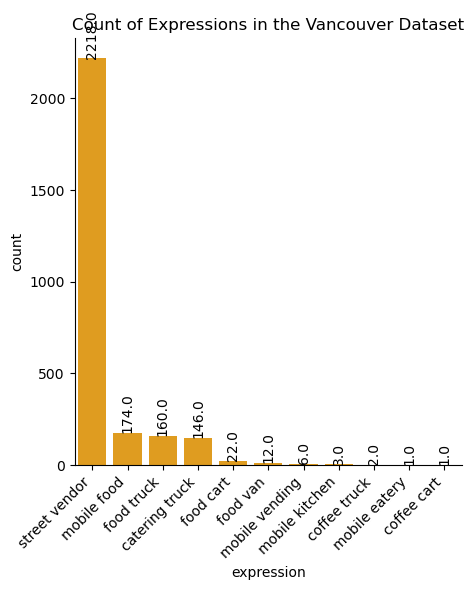

In [40]:
Vancouver_plot=sns.catplot(
            x='expression',y='count',
            data=expression_counts_source[expression_counts_source["source"]=='Vancouver'],
            kind='bar', 
            color='orange').set_xticklabels( rotation=45, horizontalalignment='right')

# Add labels to each bar
for ax in Vancouver_plot.axes.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.1f}', 
                ha='center', va='bottom', rotation=90)
        
plt.title('Count of Expressions in the Vancouver Dataset')

Text(0.5, 1.0, 'Count of Expressions in the LODE Dataset')

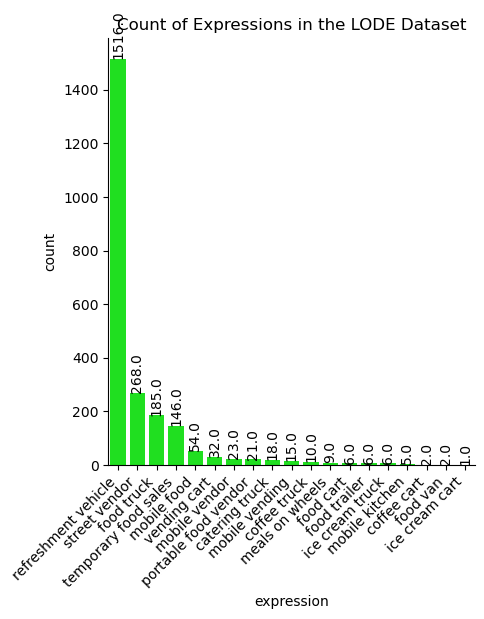

In [41]:
LODE_plot=sns.catplot(
            x='expression',y='count',
            data=expression_counts_source[expression_counts_source["source"]=='LODE'],
            kind='bar', 
            color='lime').set_xticklabels( rotation=45, horizontalalignment='right')

# Add labels to each bar
for ax in LODE_plot.axes.flat:
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{p.get_height():.1f}', 
                ha='center', va='bottom', rotation=90)
        
plt.title('Count of Expressions in the LODE Dataset')